https://www.kaggle.com/harlfoxem/housesalesprediction/data <- Link to dataset.

In [31]:
import sklearn
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Вкарвам данните

In [18]:
train = pd.read_csv('data/kc_house_data/kc_house_data.csv', index_col=['id'])

In [12]:
train.shape

(21613, 20)

In [23]:
train.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
train.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [20]:

houses = train.drop(labels=['price'], axis=1)
price = train['price']



x_train, x_test, y_train, y_test = train_test_split(houses, 
                                                    price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [21]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
date             21613 non-null object
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(14), object(1)
memory usage: 3.9+ MB


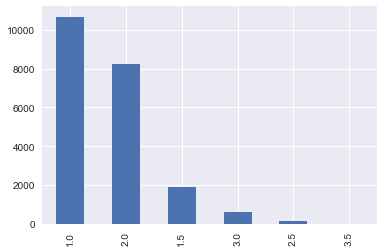

In [34]:


houses.floors.value_counts().plot(kind='bar')

Странно че има къщи с стая и половина и с 3 стаии и половина стаии

In [40]:
houses[houses.floors> 3].floors

id
6306400140    3.5
1972202010    3.5
3180100023    3.5
8673400177    3.5
1702900664    3.5
1346300150    3.5
1972200426    3.5
1972200428    3.5
Name: floors, dtype: float64

Явно има и такива сгради :Д

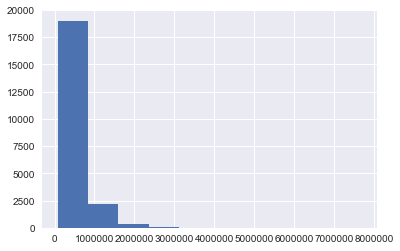

In [44]:
price.hist()

Повечето сгради струват под 150000

### Правим baseline модел

In [52]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x_train, y_train)

ValueError: could not convert string to float: '20150327T000000'

Датите са зиписани като стринг ;/ нека махнем тaзи колона

In [57]:
x_train_wo_dates = x_train.drop(labels=['date'], axis=1)
x_test_wo_dates = x_test.drop(labels=['date'], axis=1)

In [53]:
regressor = LinearRegression().fit(x_train_wo_dates, y_train)

In [56]:
regressor.score(x_train_wo_dates, y_train)

0.69832741671216148

In [58]:
regressor.score(x_test_wo_dates, y_test)

0.70239529503034071

### Като за baseline model генерализи добре.

In [61]:
predictions = regressor.predict(x_train_wo_dates)

In [65]:
predictions

array([ 804182.43810188,  688991.28794331,  352234.0406471 , ...,
        335454.35933952,  417456.89645446,  216353.20583381])

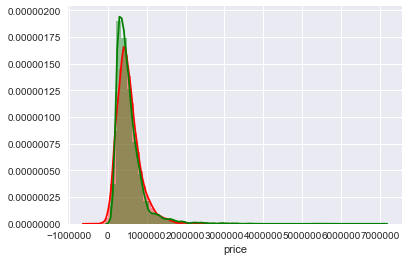

In [68]:
sns.distplot(predictions,color='red')
sns.distplot(y_train,color='green');

In [63]:
differences = (predictions - y_train).round(0)

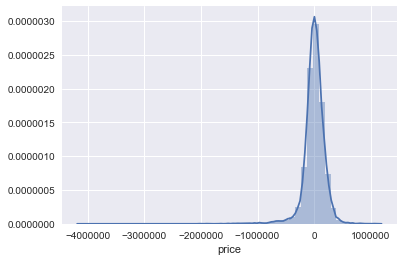

In [69]:
sns.distplot(differences)

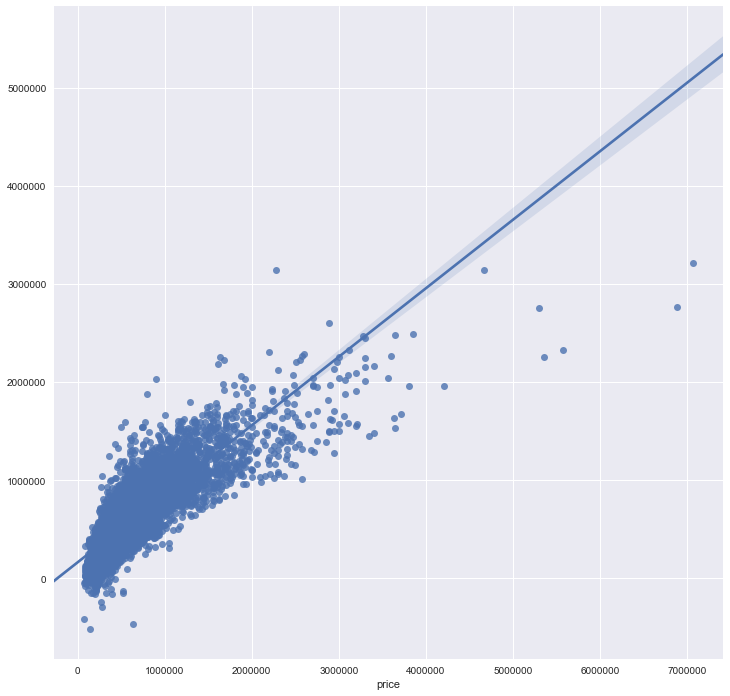

In [70]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

    Виждаме че модела не рабори при много големи цени на имоти, но това най-вероятно са outliers и бихме моглида се справим с тях чрез регуляризация

### Нека видим тежестите на регресора 

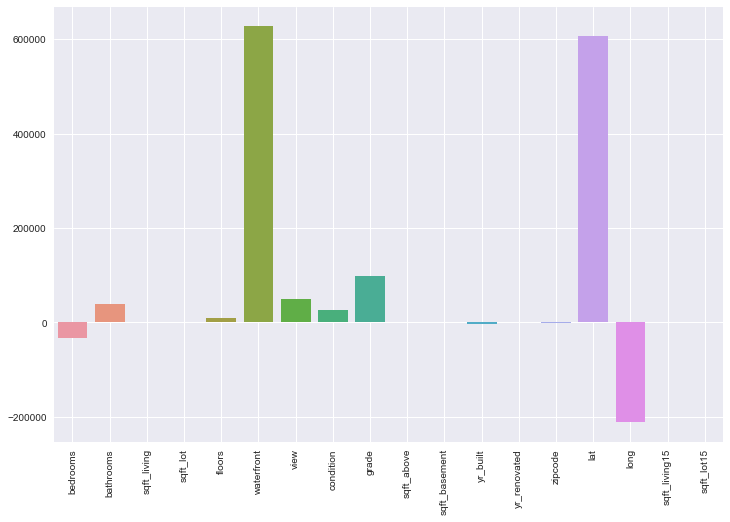

In [72]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=x_train_wo_dates.columns, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

Моделът е с доста линейно зависими feaure-и, което напълно обезмисля някои от тези които ползваме. 
 

Виждаме че с голяма тежест са височината и дали е крайбрежен имота.
Има интересна корелация м/у координатите и цената. Явно когато широчината ръсте навлизаме навътре в континента следователно нямаме морски излас :Д